In [1]:
%matplotlib inline


# Filters examples


/usr/local/lib/python3.8/dist-packages/wafo-0.4.0-py3.8-linux-x86_64.egg/wafo/kdetools/demo.py:14: UserWarning: fig import only supported on Windows
  warnings.warn('fig import only supported on Windows')


fig import only supported on Windows


Warning in dyadlength: n != 2^J


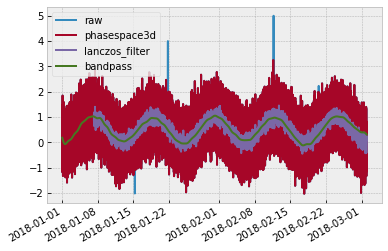

In [2]:
import pandas as pd
import toto
from toto.filters import despike_phasespace3d,lanczos_filter,bandpass_filter
import matplotlib.pyplot as plt
import numpy as np

# Create a panda timeseries of elevation

n = 86400
signal = np.random.normal(0, 0.5, n) \
          + np.sin(np.linspace(0, 5*np.pi, n))**2

signal[60000:60005]=5
signal[30000:30005]=4 

timestamp= pd.date_range("2018-01-01", periods=n, freq="60s")
df = pd.DataFrame({'time':timestamp,'signal':signal}).set_index('time')

## Apply a despike_phasespace3d
df['phasespace3d']=despike_phasespace3d.despike_phasespace3d(
	df['signal'].copy())

## Interpolate the gap
df['phasespace3d']=df['phasespace3d'].interpolate()

## Apply a lanczos_filter
df['lanczos_filter']=lanczos_filter.lanczos_filter(
	df['phasespace3d'].copy(),\
	args={'window':30,
	      'Type':'lanczos lowpas 1st order'})

## Apply a bandpass filter
df['bandpass']=bandpass_filter.bandpass_filter(
	df['phasespace3d'].copy(),\
	args={'lower cut-off (s)':3600*30,
	      'upper cut-off (s)':24*3600*30})

# Plot the results
fig, ax = plt.subplots(1)
ax.plot(df.index,df['signal'],label='raw')
ax.plot(df.index,df['phasespace3d'],label='phasespace3d')
ax.plot(df.index,df['lanczos_filter'],label='lanczos_filter')
ax.plot(df.index,df['bandpass'],label='bandpass')
ax.legend()
#ax.set_xlim(df.index[1000],df.index[2000])
fig.autofmt_xdate()
plt.show()